## Creating attention maps

In [1]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/Users/alena/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
cur_dir = !pwd
cur_dir = cur_dir[0]
genom_name = cur_dir.split('/')[-1]

In [3]:
data_path = f'{cur_dir}/1_epoch_new/atten.npy'
dev_tsv_path = f'{cur_dir}/dev.tsv'
save_to_dir = f'{cur_dir}'
# name = 'h4ac'

In [4]:
def create_plots(data_path, dev_tsv_path, save_to_dir, name):
    data = np.load(data_path)
    df = pd.read_csv(dev_tsv_path, sep='\t')
    data = pd.DataFrame(data)
    data['lbl'] = df['label']
    true_df = data[data['lbl'] == 1]
    true_df = true_df.drop('lbl', axis=1)
    true_df.reset_index(drop=True, inplace=True)
    fig, ax = plt.subplots(figsize=(4,5)) 
    sns.heatmap(true_df, cmap="YlGnBu", xticklabels=50, yticklabels=1000)
    plt.savefig(f'{save_to_dir}heatmap_{name}.png', bbox_inches='tight', dpi=300)
    
    
    fig, ax = plt.subplots(figsize=(4,1)) 
    plt.plot(true_df.mean(axis=0))
    ax.set(xticklabels=[])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.savefig(f'{save_to_dir}line_{name}.png', bbox_inches='tight', dpi=300)
    plt.show()

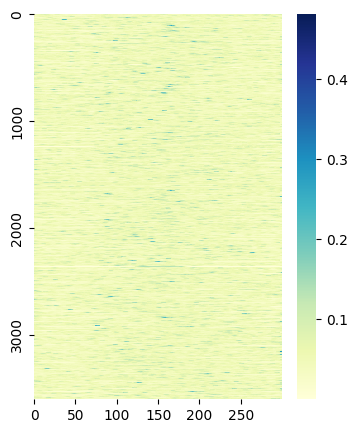

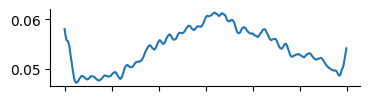

In [5]:
create_plots(data_path, dev_tsv_path, save_to_dir, genom_name)